In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

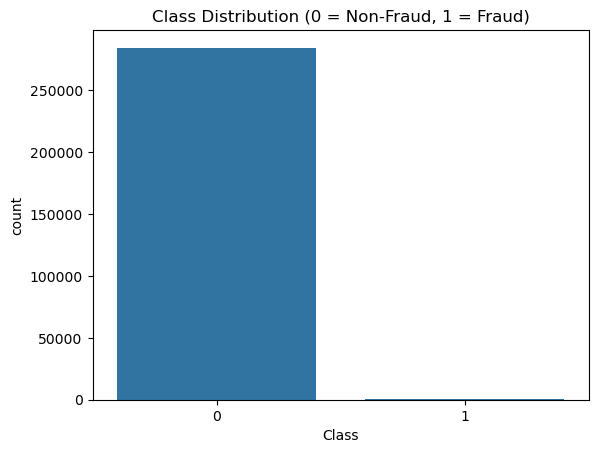

In [10]:
import seaborn as sns
sns.countplot(x='Class',data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [12]:
scaler=StandardScaler()
data=df.copy()

In [14]:
data['Amount']=scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time']=scaler.fit_transform(data['Time'].values.reshape(-1,1))

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
x=data.drop('Class',axis=1)
y=data['Class']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

In [19]:
model=LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [20]:
y_pred=model.predict(X_test)
y_proba=model.predict_proba(X_test)[:,1]

In [22]:
print(X_test.shape,y_test.shape)

(56962, 30) (56962,)


In [21]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[55526  1338]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9765    0.9880     56864
           1     0.0630    0.9184    0.1180        98

    accuracy                         0.9764     56962
   macro avg     0.5314    0.9474    0.5530     56962
weighted avg     0.9982    0.9764    0.9865     56962


ROC AUC Score: 0.9794339232597934


In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [24]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=42)

In [26]:
forest.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [30]:
y_pred_rf=forest.predict(X_test)
y_pred_rf_prob=forest.predict_proba(X_test)[:,1]

In [32]:


# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4))

print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_rf_prob))



Confusion Matrix:
[[56856     8]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9101    0.8265    0.8663        98

    accuracy                         0.9996     56962
   macro avg     0.9549    0.9132    0.9330     56962
weighted avg     0.9995    0.9996    0.9996     56962


ROC AUC Score: 0.9908691019317125


In [36]:
from sklearn.metrics import precision_recall_curve

# Get prediction probabilities
y_pred_rf_prob = forest.predict_proba(X_test)[:, 1]

# Try a lower threshold (e.g., 0.3)
custom_thresh = 0.4
y_pred_custom = (y_pred_rf_prob >= custom_thresh).astype(int)

# Re-evaluate
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf_prob))  # stays the same


[[56848    16]
 [   13    85]]
              precision    recall  f1-score   support

           0     0.9998    0.9997    0.9997     56864
           1     0.8416    0.8673    0.8543        98

    accuracy                         0.9995     56962
   macro avg     0.9207    0.9335    0.9270     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC: 0.9908691019317125


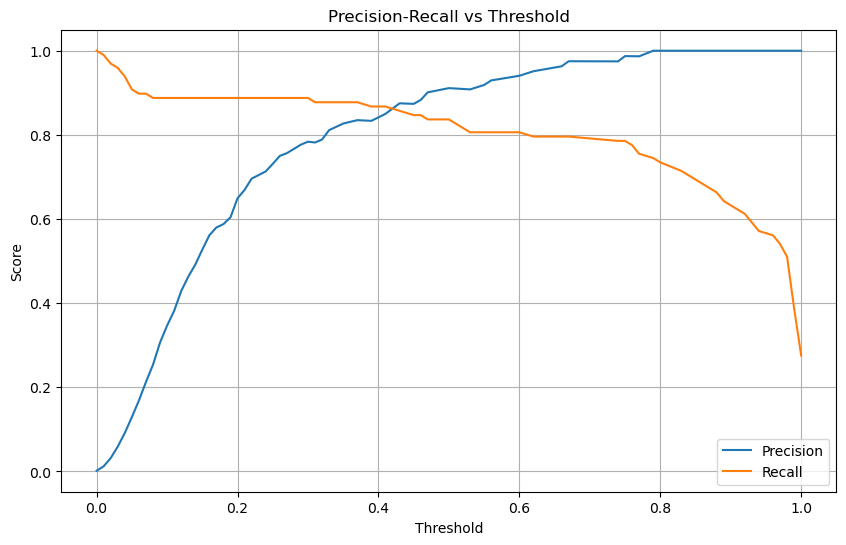

In [34]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf_prob)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
import pickle

# Save the trained model
with open('fraud_detection_model.pkl', 'wb') as f:
    pickle.dump(forest, f)

# Save the custom threshold
custom_threshold = 0.4  # or whatever threshold you used
with open('fraud_threshold.pkl', 'wb') as f:
    pickle.dump(custom_threshold, f)
